In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from numpy import linalg as LA
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load the dataset from the CSV file
df = pd.read_csv('BostonHousing.csv')

# Display the first few rows of the dataset
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [6]:
X = df.drop(columns=['medv'])

# Target Variable (y): Select only the 'medv' column
y = df['medv']

# Display the features (X) and the target variable (y)
print("Features (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())

Features (X):
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  

Target Variable (y):
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
# standard sclaer
from sklearn.preprocessing import StandardScaler
def std_scaler(X_train,X_test):
  scaler = StandardScaler()
  scaler.fit(X_train)
  X_train_scale=scaler.transform(X_train)
  X_test_scale=scaler.transform(X_test)
  # add a column of 1 for X
  X_train_scale=np.append(np.ones(shape=(X_train.shape[0],1)),X_train_scale,axis=1)
  X_test_scale=np.append(np.ones(shape=(X_test.shape[0],1)),X_test_scale,axis=1)
  return X_train_scale, X_test_scale

X_train,X_test=std_scaler(X_train,X_test)

parameters

In [9]:
 # Set hyperparameters
alpha = 0.2
iterations = 100
tolerance = 0.00001

# Initialize Theta Values to 0
w= np.zeros(X_train.shape[1],dtype=float)

Sub Functions to Implement Coordinate Descent

cost function
rho_j
z_j
coordinate_descent

Coordinate Descent for LASSO

In [10]:
# function for: define cost function ; calculate the gradient
## alpha = shrinkage factor
def cost_function_lasso(X,w,y,alpha):
  n=y.size
  y_pred=np.matmul(X,w.T)
  error=y_pred-y
  theta_norm=LA.norm(w,ord=1)
  cost = np.dot(error.T, error)+alpha*theta_norm
  return cost

In [11]:
def compute_rho_j(X,y,w,j):
  X_k = np.delete(X,j,axis=1) #Remove the j variable i.e. j column
  w_k = np.delete(w,j) #Remove the weight j
  predict = np.matmul(X_k, w_k.T)
  residual = y - predict
  X_j=X[:,j] # m*1 vector
  rho_j = np.dot(X_j,residual)
  return(rho_j)

In [12]:
#z computation for unnormalised features
def compute_z_j(X,j):
  X_j=X[:,j]
  z_j = np.dot(X_j,X_j) #Compute sum for each column
  return(z_j)

In [13]:
def coordinate_descent_lasso(y,X,w,alpha,tolerance):
    max_step = 100.
    iteration = 0
    N,d=X.shape # N=num of point ; d=num of features
    cost_diff=1
    cost_array={}
    while(cost_diff > tolerance):
        iteration += 1
        #print("Iteration (start) : ",iteration)
        cost_old=cost_function_lasso(X,w,y,alpha)

        for j in range(d): #Take the number of features ie columns
            rho_j = compute_rho_j(X,y,w,j)
            z_j=compute_z_j(X,j)
            if j == 0: #Intercept is not included with the alpha regularisation
                w[j] = rho_j/z_j
            elif rho_j < -alpha*N:
                w[j] = (rho_j + (alpha*N))/z_j
            elif rho_j > -alpha*N and rho_j < alpha*N:
                w[j] = 0
            elif rho_j > alpha*N:
                w[j] = (rho_j - (alpha*N))/z_j
            else:
                w[j] = np.NaN
        # update the cost function
        cost_new=cost_function_lasso(X,w,y,alpha)
        cost_array[iteration]=cost_new
        cost_diff=abs(cost_new-cost_old)

    print(w)
    return w, iteration, cost_array

In [14]:
# run the coordinate descent for our train set
w_cd_lasso,iter_lasso,cost_array_lasso=coordinate_descent_lasso(y_train,X_train,w,alpha,tolerance)

[22.97079646 -0.39948163  0.1892843   0.          0.82759114 -0.80309358
  2.93205242  0.         -1.5002346   0.          0.         -1.70669261
  0.83142358 -4.01081814]


<Axes: xlabel='iters', ylabel='cost'>

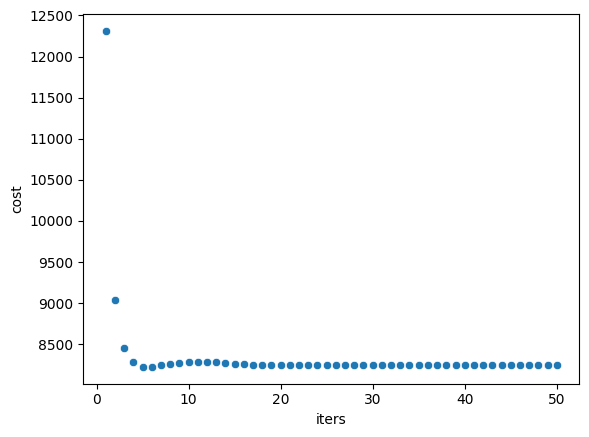

In [15]:
# function for: display the cost-iter trend
def plot_cost_iter(cost_array):
  iters=cost_array.keys()
  cost=cost_array.values()
  fig=sns.scatterplot(x=iters,y=cost)
  fig.set_xlabel('iters')
  fig.set_ylabel('cost')
  return fig

# display
fig_lasso=plot_cost_iter(cost_array_lasso)
fig_lasso

Coordinate Descent for OLS (Ordinary Least Squares)

In [16]:
# function for: define cost function ; calculate the gradient
def cost_function_ols(X,w,y):
  n=y.size
  y_pred=np.matmul(X,w.T)
  error=y_pred-y
  cost = (0.5*n)*np.dot(error.T, error)
  return cost

In [17]:
def coordinate_descent_ols(y,X,w,tolerance):
    max_step = 500
    iteration = 0
    N,d=X.shape # N=num of point ; d=num of features
    cost_diff=1
    cost_array={}
    while(cost_diff > tolerance):
        iteration += 1
        #print("Iteration (start) : ",iteration)
        cost_old=cost_function_ols(X,w,y)

        for j in range(d): #Take the number of features ie columns
            rho_j = compute_rho_j(X,y,w,j)
            z_j=compute_z_j(X,j)
            w[j] = rho_j/z_j

        # update the cost function
        cost_new=cost_function_ols(X,w,y)
        cost_array[iteration]=cost_new
        cost_diff=abs(cost_new-cost_old)

    print(w)
    return w, iteration, cost_array

[22.97079646 -0.98856987  0.8679275   0.40501448  0.86184024 -1.90008084
  2.80813738 -0.35866919 -3.0455284   2.0327132  -1.36397513 -2.08252829
  1.04125563 -3.9262893 ]


<Axes: xlabel='iters', ylabel='cost'>

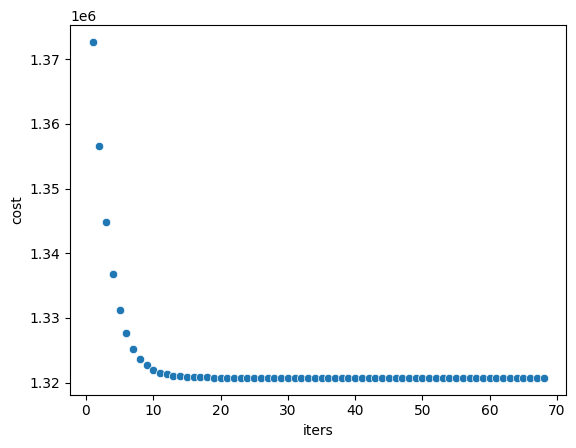

In [18]:
# run the coordinate descent for our train set
w_cd_ols,iter_ols,cost_array_ols=coordinate_descent_ols(y_train,X_train,w,tolerance)

# display
fig_ols=plot_cost_iter(cost_array_ols)
fig_ols

Model Performance on Test Dataset --- 4 Models Compare (ours and scikit package)

(Own) Coordinate descent Lasso
Scikit Lasso
(Own) Coordinate descent OLS
Scikit OLS

In [19]:
# scatterplot the y_pred and y_actual, display the MSE, theta
def plot_pred_actual(w,X_test,y_test):
  num_of_pt=y_test.size
  y_test_pred=np.matmul(X_test,w.T)
  mse=mean_squared_error(y_test,y_test_pred)
  # plot the graph
  fig, ax1 = plt.subplots(1,1,constrained_layout=True)
  sns.scatterplot(x=y_test_pred,y=y_test,ax=ax1)
  xpoints = ypoints = plt.xlim()
  plt.plot(xpoints, ypoints, linestyle='--', color='k')
  ax1.set_xlabel('y_pred')
  ax1.set_ylabel('y_actual')
  ax1.text(0,0.92,f'The MSE = {mse}',transform=ax1.transAxes)
  ax1.text(0,0.85,f'The num of Point = {num_of_pt}',transform=ax1.transAxes)
  return mse


1. Our Coodinate Descent Lasso

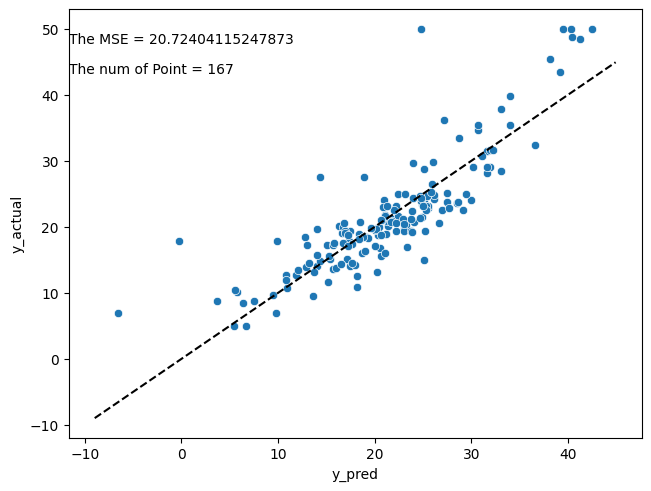

In [20]:
mse_cd_lasso_test=plot_pred_actual(w=w_cd_lasso,
                 X_test=X_test,
                 y_test=y_test)


2. Scikit Lasso

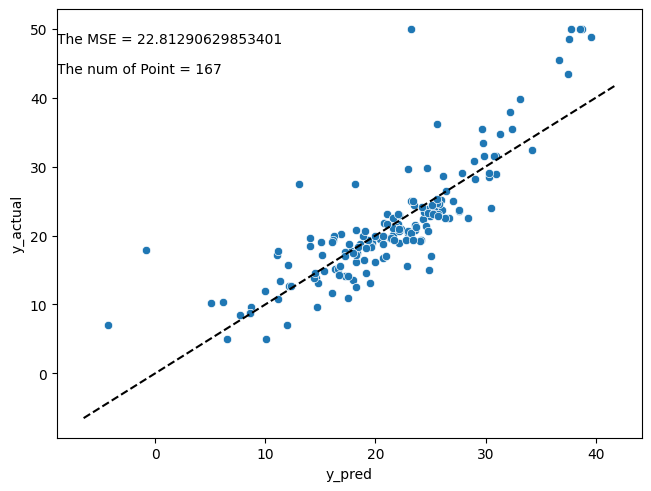

In [21]:
from sklearn.linear_model import Lasso

# fit the lasso
sk_lasso=Lasso(alpha,fit_intercept=False)
sk_lasso.fit(X_train,y_train)
w_lasso=sk_lasso.coef_

# test set result
mse_sk_lasso_test=plot_pred_actual(w_lasso,X_test,y_test)


3. Our Coordinate Descent OLS

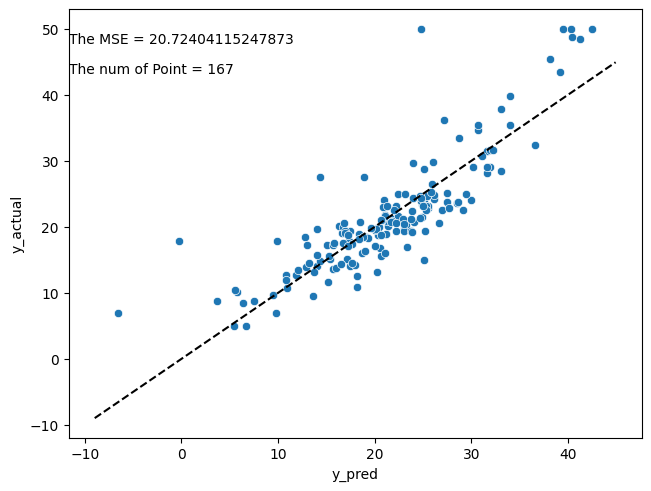

In [22]:
mse_cd_ols_test=plot_pred_actual(w=w_cd_ols,
                 X_test=X_test,
                 y_test=y_test)

 Scikit OLS

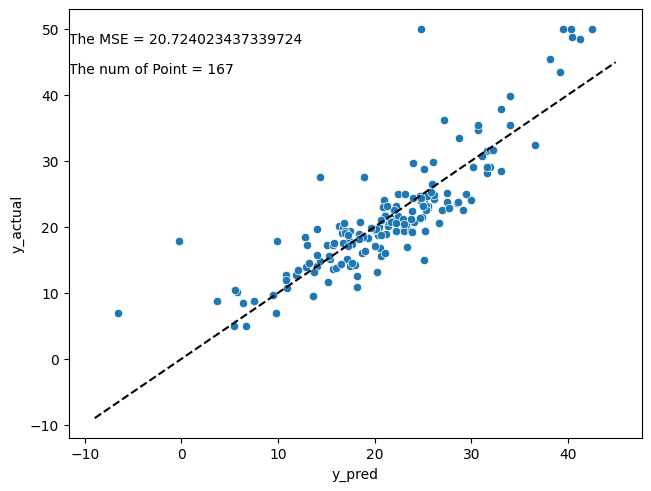

In [23]:
from sklearn.linear_model import LinearRegression

# fit the lasso
sk_ols=LinearRegression(fit_intercept=False)
sk_ols.fit(X_train,y_train)
w_ols=sk_ols.coef_

# test set result
mse_sk_ols_test=plot_pred_actual(w_ols,X_test,y_test)

Models MSE Compare

-  Coordinate Descent LASSO  =  20.72404115247873
-  Scikit LASSO  =  22.81290629853401
-  Coordinate Descent OLS  =  20.72404115247873
-  Scikit OLS  =  20.724023437339724


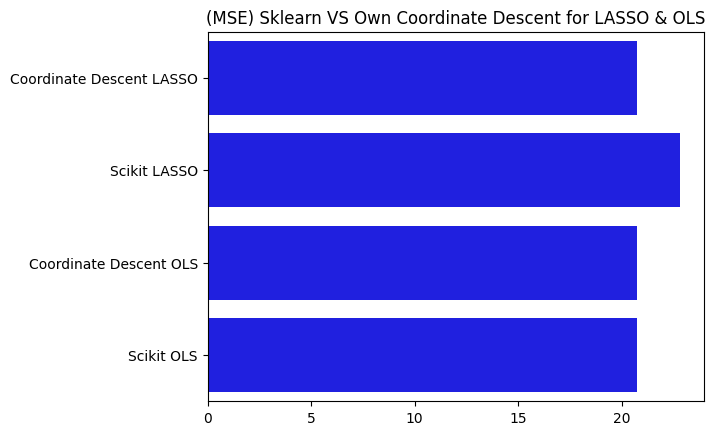

In [24]:
#compare the mse for our gradient descent regression VS sklearn package
x=[mse_cd_lasso_test,mse_sk_lasso_test,mse_cd_ols_test,mse_sk_ols_test]
y=['Coordinate Descent LASSO','Scikit LASSO','Coordinate Descent OLS','Scikit OLS']
fig=sns.barplot(x=x,y=y,color='blue')
fig.set_title('(MSE) Sklearn VS Own Coordinate Descent for LASSO & OLS')
for mse,model in zip(x,y):
  print('- ',model, ' = ',mse)

Explore additional evaluation metrics or visualizations:After calculating the Mean Squared Error (MSE) for each model, you might want to visualize the predictions versus the actual values using scatter plots. This will help you understand how well the models are capturing the underlying patterns in the data

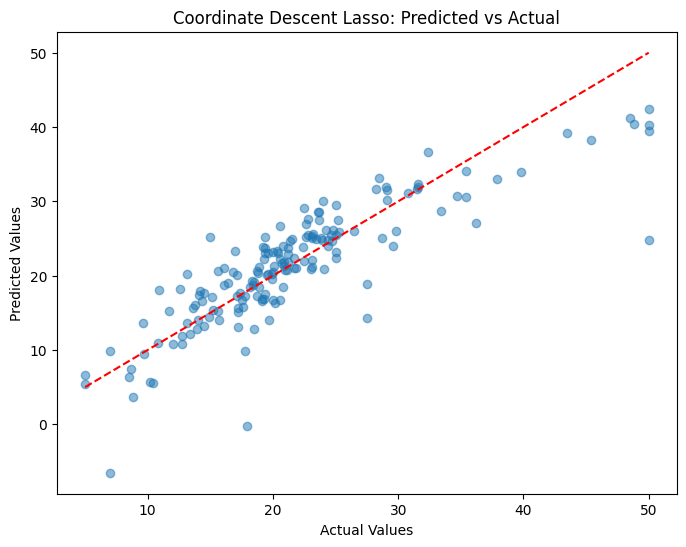

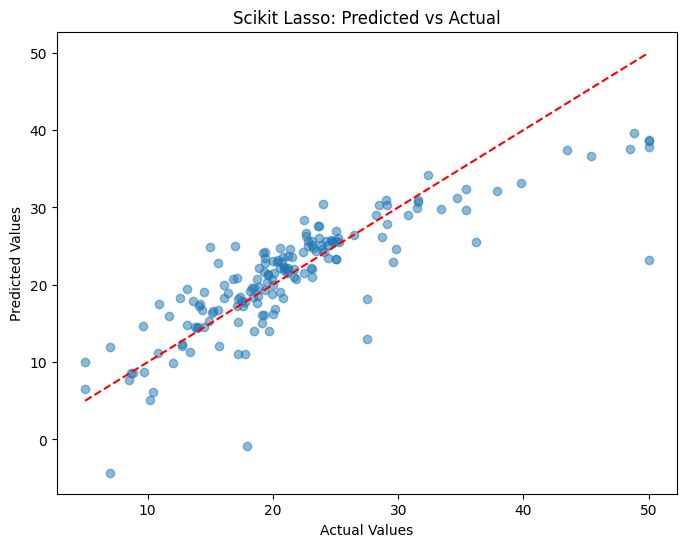

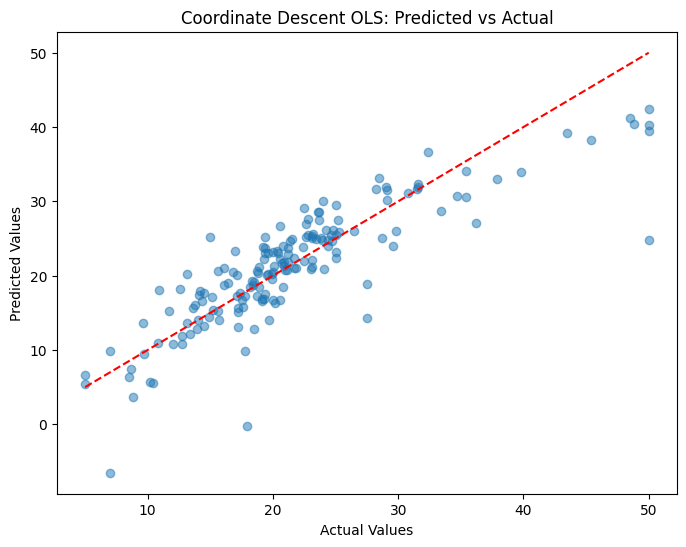

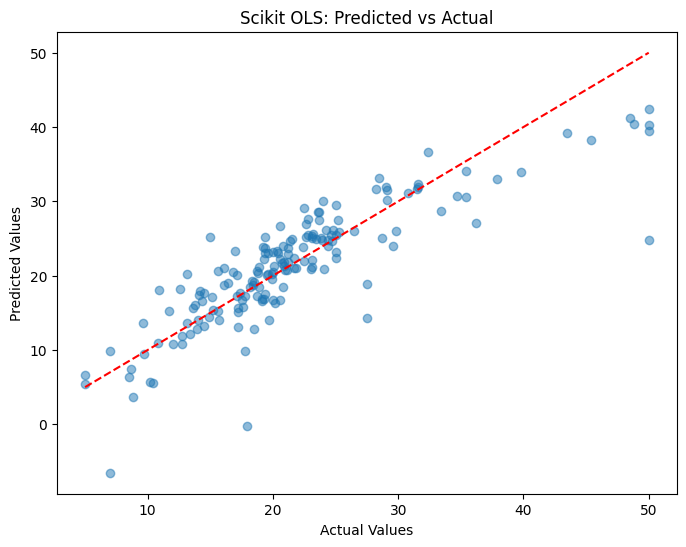

In [28]:
# Calculate predictions for each model
y_test_pred_cd_lasso = np.matmul(X_test, w_cd_lasso.T)
y_test_pred_sk_lasso = sk_lasso.predict(X_test)
y_test_pred_cd_ols = np.matmul(X_test, w_cd_ols.T)
y_test_pred_sk_ols = sk_ols.predict(X_test)

# Plot for each model
for y_pred, model_name in zip([y_test_pred_cd_lasso, y_test_pred_sk_lasso, y_test_pred_cd_ols, y_test_pred_sk_ols],
                              ['Coordinate Descent Lasso', 'Scikit Lasso', 'Coordinate Descent OLS', 'Scikit OLS']):
    plot_pred_vs_actual(y_pred, y_test, model_name)


Model Weights Compare (w)

In [26]:
def plot_w(w,model_name):
  fig=sns.barplot(x=w,y=[str(i) for i in range(14)])
  fig.set_title(f'{model_name} Weight Value')
  plt.show()
  return w

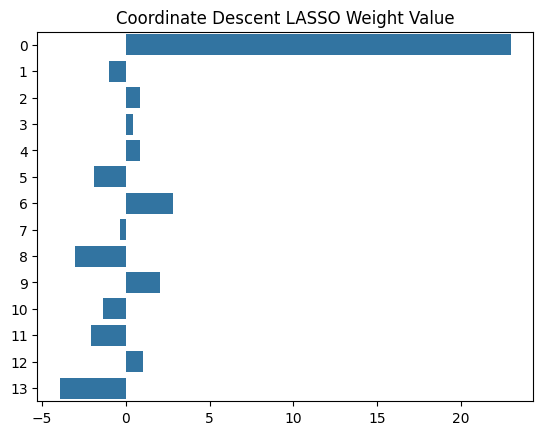

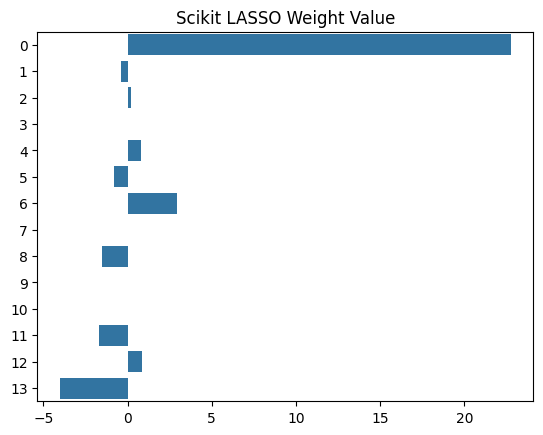

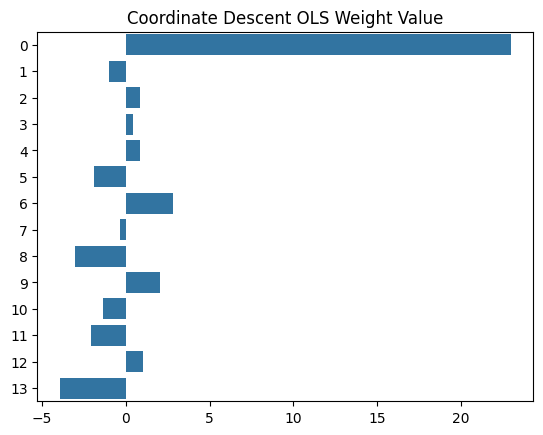

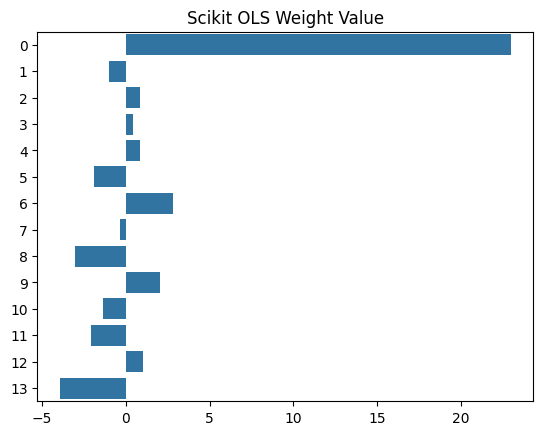

In [27]:
w_list=[w_cd_lasso,w_lasso,w_cd_ols,w_ols]
model_name_list=['Coordinate Descent LASSO','Scikit LASSO','Coordinate Descent OLS','Scikit OLS']

for w, model_name in zip(w_list,model_name_list):
  plot_w(w,model_name)

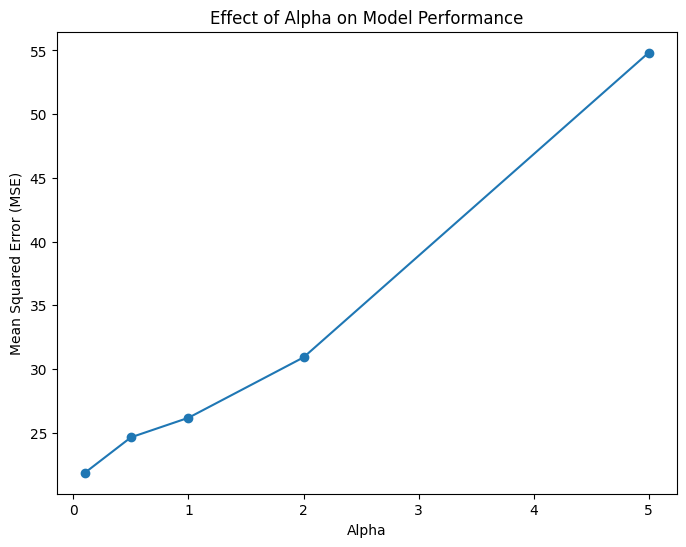

In [32]:
from sklearn.metrics import mean_squared_error

alphas = [0.1, 0.5, 1.0, 2.0, 5.0]
mse_scores = []

for alpha in alphas:
    # Train Lasso model with current alpha
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)

    # Predict on test set
    y_pred = lasso_model.predict(X_test)

    # Calculate MSE on test set
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot the MSE scores for different alpha values
plt.figure(figsize=(8, 6))
plt.plot(alphas, mse_scores, marker='o')
plt.title('Effect of Alpha on Model Performance')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()
